In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\moonDataset.csv")

In [11]:
df.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


In [17]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [25]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

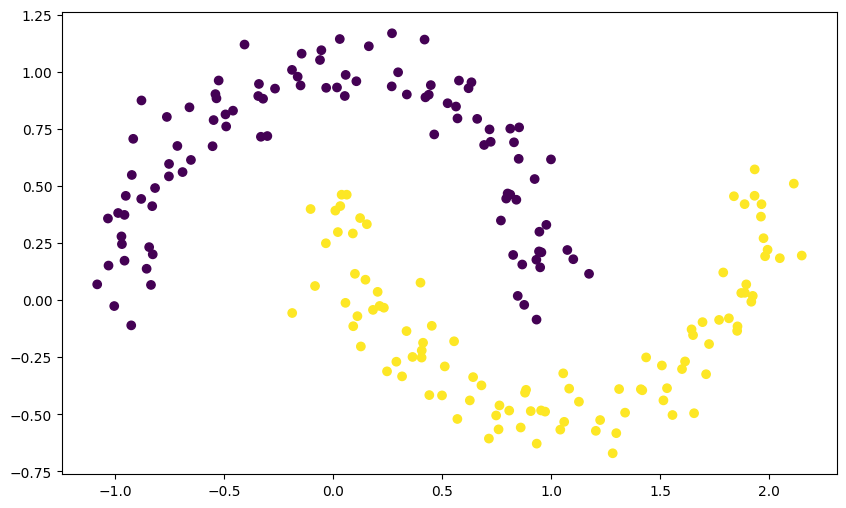

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

<Axes: >

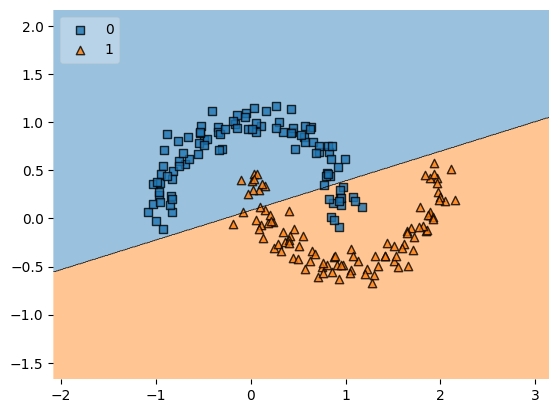

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X,y.astype('int'),clf,legend=2)

In [30]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.875)

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [43]:
clf1 = LogisticRegression()

clf1.fit(X_trf,y)

LogisticRegression()

In [45]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))


np.float64(0.97)

In [46]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

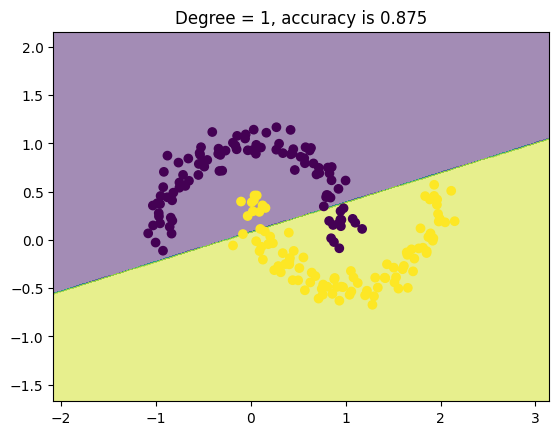

In [47]:
plot_decision_boundary(X,y)

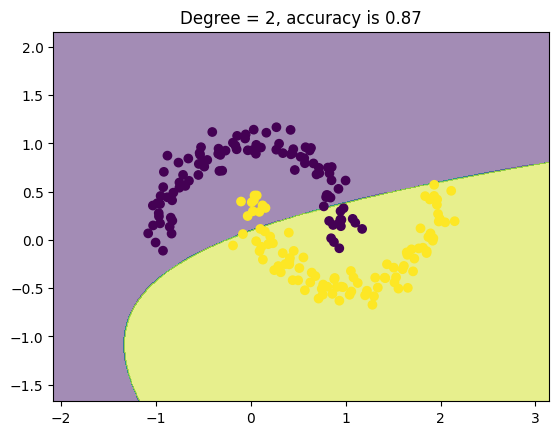

In [48]:
plot_decision_boundary(X,y,degree=2)

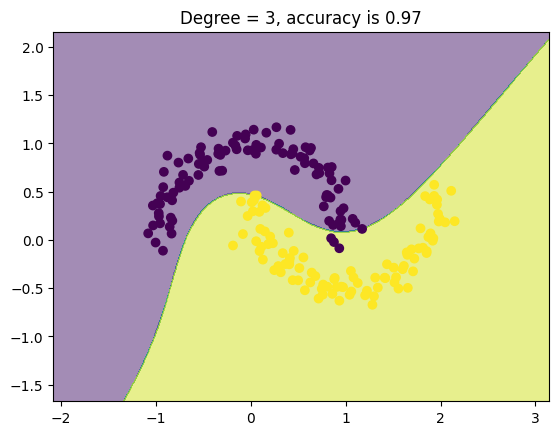

In [49]:
plot_decision_boundary(X,y,degree=3)